In [213]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
import random as rd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

1a. Load Data: Load the Iris dataset from the `sklearn.datasets` module.


In [214]:
iris = load_iris(as_frame=True).frame
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


1b. Explore the Data: Display basic information about the dataset


In [215]:
iris.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [216]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [217]:
iris1 = load_iris()
iris1.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [218]:
iris1.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Number of samples : 150

Features : sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)

Target classes : 'setosa', 'versicolor', 'virginica'

2. Data Preprocessing

c. check missing values if any: No missing values found

In [219]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [220]:
model_rfc = RandomForestRegressor()
X = iris.drop('target', axis=1)
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)
model_rfc.fit(X_train, y_train)


fs = pd.DataFrame(index=X.columns, data=model_rfc.feature_importances_, columns=['Feature Importance'])
sorted_fs = fs.sort_values(by='Feature Importance', ascending= False)
sorted_fs

,Feature Importance
petal length (cm),0.583400
petal width (cm),0.401572
sepal width (cm),0.009968
sepal length (cm),0.005061


For visualizing K Means, Hierarchial and DB Scan, only 2 features on a plot, Taking Feature importance where the highest importance feature (i.e., "Petal Length", "Petal Width") will be plotted. Later in the PCA, we got the same results. 

2d. scale or normalize features: for better clustering performance

In [221]:
scale = StandardScaler()
scaled_iris = scale.fit_transform(iris)
scaled_iris

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.22474487e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.22474487e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

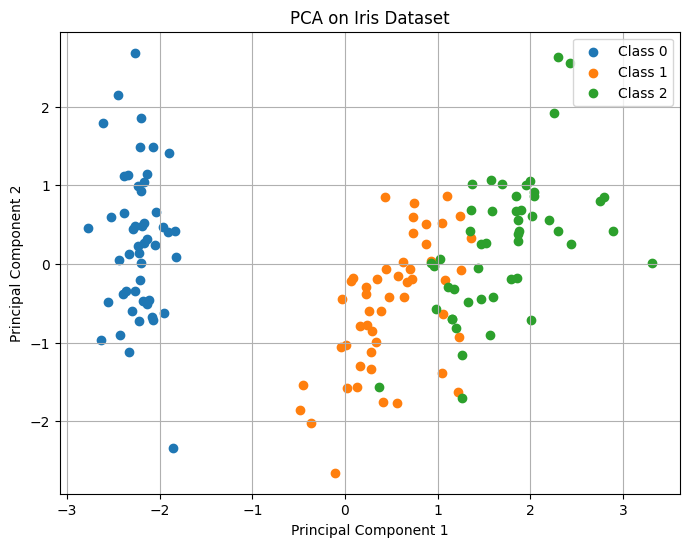

Explained Variance Ratio: [0.72962445 0.22850762]


In [222]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}')
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

In [223]:
print("Principal Components:")
print(pca.components_)

Principal Components:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


Principal Component 1:
Feature 1 (Sepal Length): 0.52106591
Feature 2 (Sepal Width): -0.26934744
Feature 3 (Petal Length): 0.5804131
Feature 4 (Petal Width): 0.56485654
Principal Component 2:
Feature 1 (Sepal Length): 0.37741762
Feature 2 (Sepal Width): 0.92329566
Feature 3 (Petal Length): 0.02449161
Feature 4 (Petal Width): 0.06694199

As PC1 contributing the most, using PC1 we will consider, Petal length and Petal Width to visualize (same as before in Feature Importance)

3. Clustering Algorithms
(e)
(i) K - Means Clustering: 

Assumptions:
1. Clusters are spherical and of equal size.
2. Variance of the distribution of each feature is the same for all clusters.

Advantages:
1. Simple and easy to implement.
2. Computationally efficient, making it suitable for large datasets.
3. Works well when the clusters are well-separated and have similar densities.

Disadvantages:
1. Requires the number of clusters to be specified a priori, which may not always be known.
2. Sensitive to initial cluster centroids, leading to convergence to local optima.
3. May produce poor results for non-linearly separable data or clusters with irregular shapes.

(e)
(ii) Hierarchical clustering (Agglomerative clustering):

Assumptions:
1. Each data point starts as its own cluster and progressively merges clusters based on similarity.

Advantages:
1. Does not require the number of clusters to be specified beforehand.
2. Provides a hierarchical structure of clusters, allowing for exploration at different granularity levels.
3. Can handle non-linear data and clusters with irregular shapes.

Disadvantages:
1. Computationally expensive, especially for large datasets.
2. Memory-intensive, as it needs to store the entire dataset and the distance matrix.
3. May not scale well to high-dimensional data.

(e)
(iii) DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Assumptions:
1. Clusters are dense regions separated by areas of lower density.

Advantages:
1. Does not require specifying the number of clusters in advance.
2. Robust to outliers and able to identify noise points.
3. Can find clusters of arbitrary shapes and sizes.

Disadvantages:
1. Sensitivity to distance metric and density parameters (epsilon and min_samples).
2. Difficulty in finding suitable parameters for datasets with varying densities.
3. Computationally intensive for large datasets, especially in high-dimensional spaces.

4. Clustering Experimentation:
(f)
To apply each clustering algorithm to the preprocessed dataset:


Using scaled data - K means

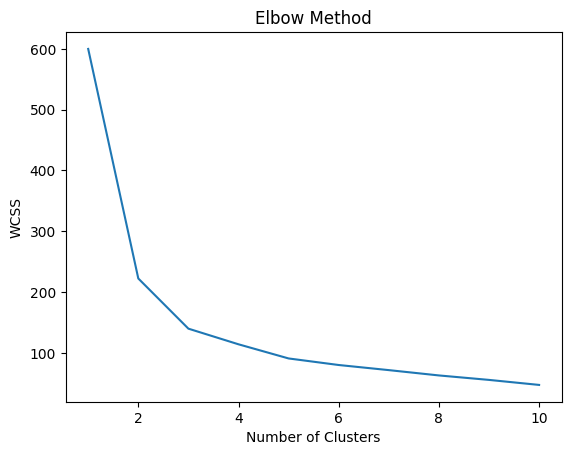

In [224]:
#Elbow Method
iris = load_iris()
iris = iris.data
scale = StandardScaler()
scaled_iris = scale.fit_transform(iris)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_iris)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()


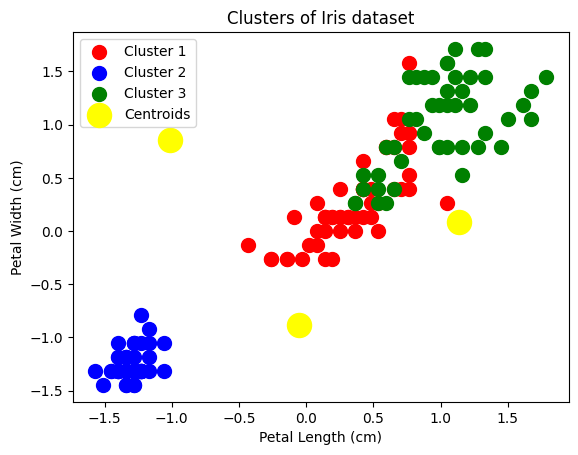

In [225]:
# Based on the Elbow method, the optimal number of clusters as 3 (bend or decrease)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(scaled_iris)

plt.scatter(scaled_iris[y_kmeans == 0, 2], scaled_iris[y_kmeans == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_iris[y_kmeans == 1, 2], scaled_iris[y_kmeans == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_iris[y_kmeans == 2, 2], scaled_iris[y_kmeans == 2, 3], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Iris dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

Scaled data - Hierarchial clustering

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


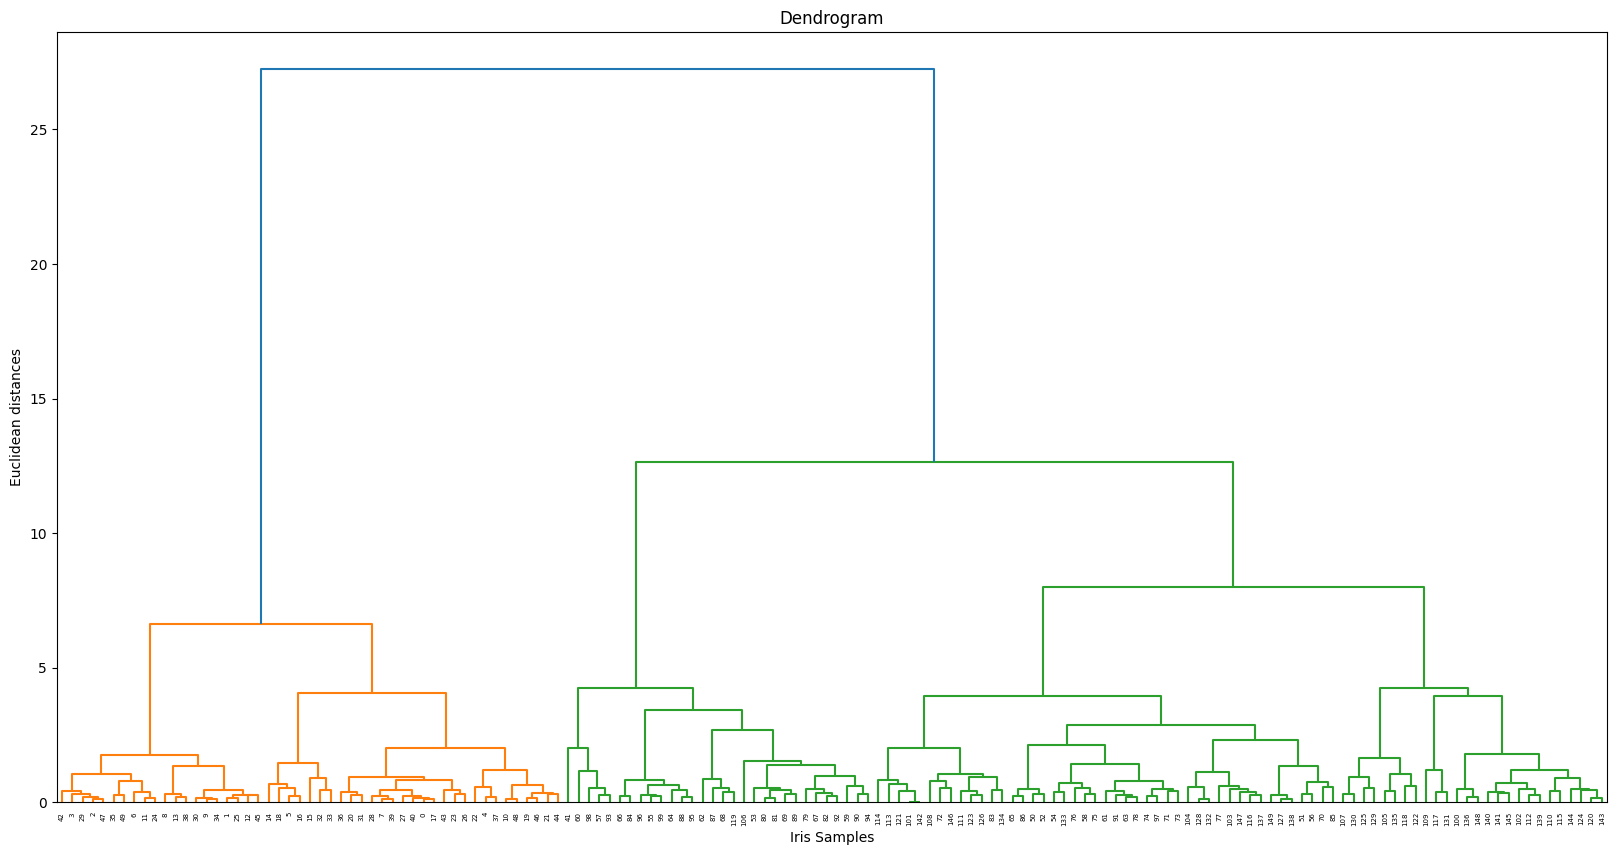

In [226]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(scaled_iris)

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(sch.linkage(scaled_iris, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Iris Samples")
plt.ylabel("Euclidean distances")
plt.show()


scaled data - DB Scan

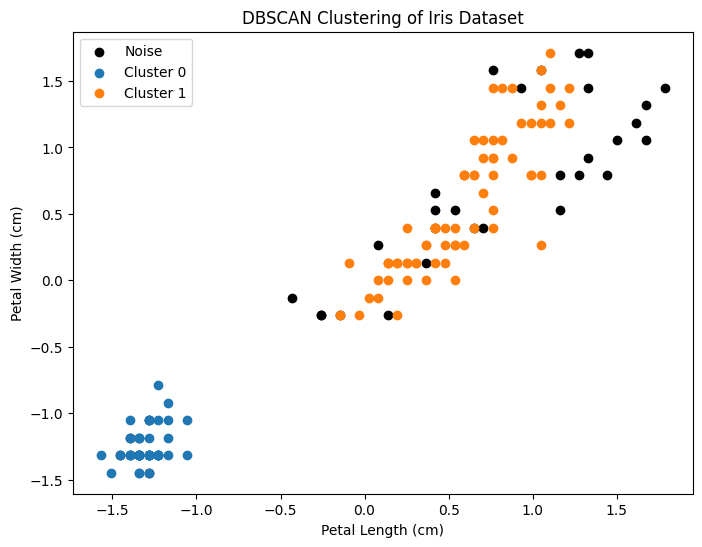

In [227]:
# Create and fit the DBSCAN clustering model
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(scaled_iris)

plt.figure(figsize=(8, 6))


for label in np.unique(y_dbscan):
    if label == -1:
        plt.scatter(scaled_iris[y_dbscan == label][:, 2], scaled_iris[y_dbscan == label][:, 3], color='black', label='Noise')
    else:
        plt.scatter(scaled_iris[y_dbscan == label][:, 2], scaled_iris[y_dbscan == label][:, 3], label=f'Cluster {label}')

plt.title('DBSCAN Clustering of Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

(4) (g)
Explore different parameter settings:
1. KMeans shows decreasing silhouette scores as the number of clusters increases, indicating poorer performance with more clusters.
2. Hierarchical clustering with single linkage shows the highest silhouette score, suggesting better-defined clusters compared to other linkage methods.
3. DBSCAN performs better with larger values of eps and min_samples, with eps=0.7 and min_samples=3 or 4 yielding the highest silhouette scores, indicating well-defined clusters. Lower values of eps and min_samples result in negative silhouette scores, indicating poor clustering.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

Clustering Results:
KMeans (k=2): Silhouette Score = 0.5817500491982808
KMeans (k=3): Silhouette Score = 0.45994823920518635
KMeans (k=4): Silhouette Score = 0.38694104154427816
KMeans (k=5): Silhouette Score = 0.3455109959980946
Hierarchical (ward): Silhouette Score = 0.4466890410285909
Hierarchical (complete): Silhouette Score = 0.44961848359884726
Hierarchical (average): Silhouette Score = 0.4802669329728697
Hierarchical (single): Silhouette Score = 0.504645610832545
DBSCAN (eps=0.3, min_samples=2): Silhouette Score = -0.061943796413034186
DBSCAN (eps=0.3, min_samples=3): Silhouette Score = -0.1472998691016136
DBSCAN (eps=0.3, min_samples=4): Silhouette Score = -0.20734607362884194
DBSCAN (eps=0.5, min_samples=2): Silhouette Score = 0.11500593389476224
DBSCAN (eps=0.5, min_samples=3): Silhouette Score = 0.15971036873870179
DBSCAN (eps=0.5, min_samples=4): Silhouette Score = 0.36457435678297523
DBSCAN (eps=0.7, min_samples=2): Silhouette Score = 0.4515664736593728
DBSCAN (eps=0.7, mi

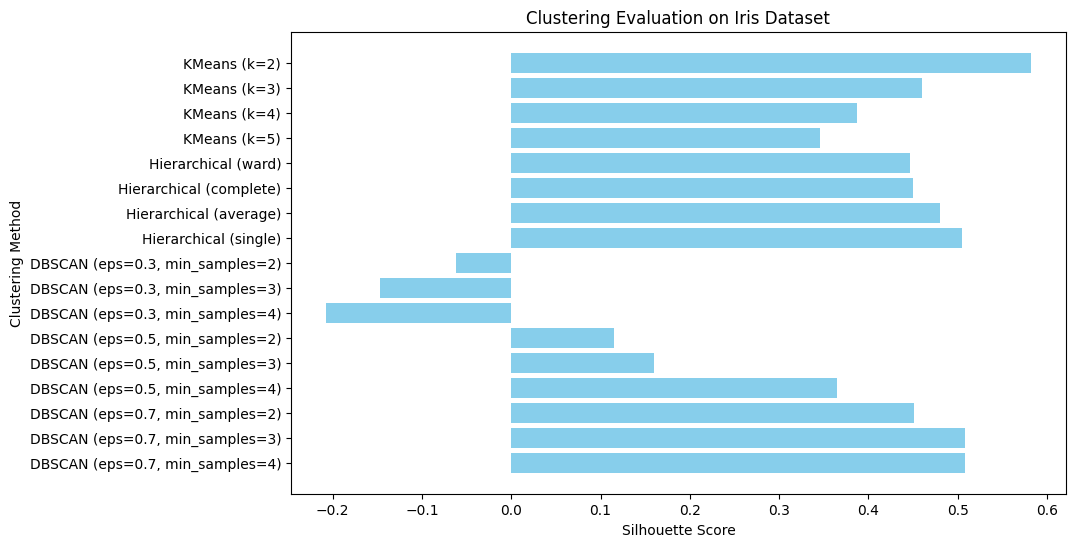

In [228]:
iris = load_iris()
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


k_values = [2, 3, 4, 5]
linkage_methods = ['ward', 'complete', 'average', 'single']
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [2, 3, 4]

# Perform clustering for each parameter setting and evaluate using silhouette score
results = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_score = silhouette_score(X_scaled, kmeans_labels)
    results.append((f'KMeans (k={k})', kmeans_score))

for linkage in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)
    hierarchical_score = silhouette_score(X_scaled, hierarchical_labels)
    results.append((f'Hierarchical ({linkage})', hierarchical_score))

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        dbscan_score = silhouette_score(X_scaled, dbscan_labels)
        results.append((f'DBSCAN (eps={eps}, min_samples={min_samples})', dbscan_score))


print("Clustering Results:")
for method, score in results:
    print(f"{method}: Silhouette Score = {score}")

# Visualize results
plt.figure(figsize=(10, 6))
methods = [method for method, _ in results]
scores = [score for _, score in results]
plt.barh(methods, scores, color='skyblue')
plt.xlabel('Silhouette Score')
plt.ylabel('Clustering Method')
plt.title('Clustering Evaluation on Iris Dataset')
plt.gca().invert_yaxis()
plt.show()


5.(h) Evaluation of the quality of clustering using metrics like silhouette score

0.45994823920518635


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


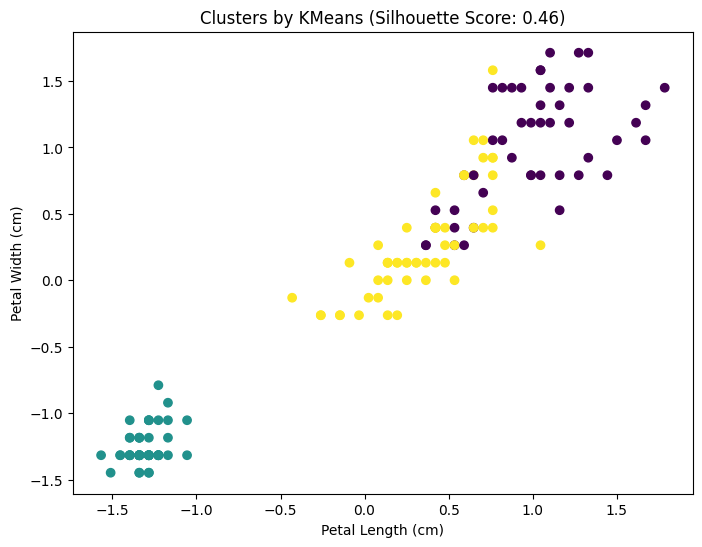

0.4466890410285909


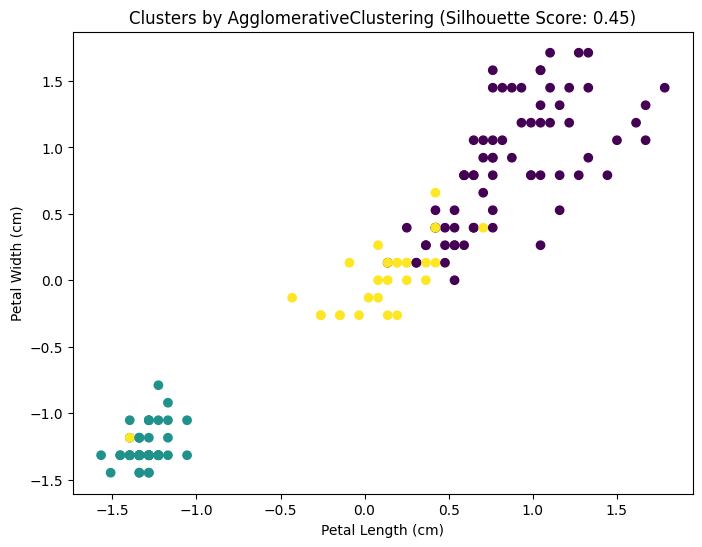

0.3565164814270073


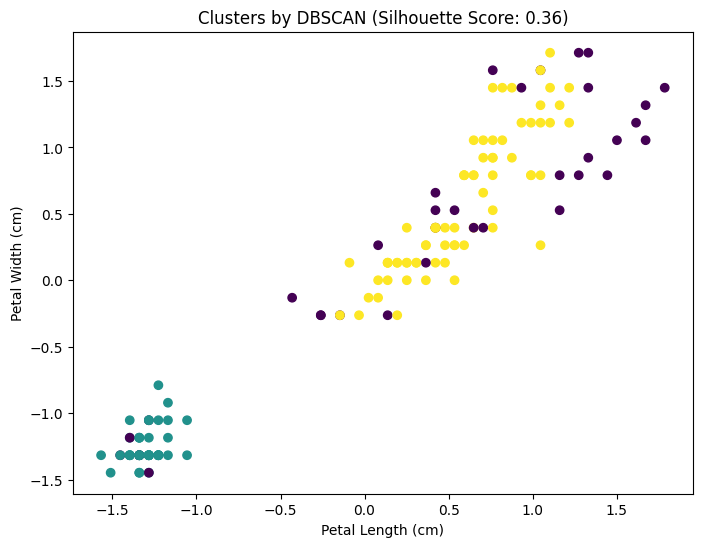

In [229]:
for model in [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3), DBSCAN(eps=0.5, min_samples=5)]:
    # Fit the model and obtain cluster labels
    labels = model.fit_predict(scaled_iris)
    
    # Calculate silhouette score
    silhouette = silhouette_score(scaled_iris, labels)
    print(silhouette)
    
    # Visualize clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(scaled_iris[:, 2], scaled_iris[:, 3], c=labels, cmap='viridis')
    plt.title(f'Clusters by {type(model).__name__} (Silhouette Score: {silhouette:.2f})')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.show()



6. Interpretation and Analysis

To analyze the clustering results and interpret the identified clusters, as well as to compare and contrast the effectiveness of different clustering algorithms for the Iris dataset

Interpretation of Clusters:
Cluster 1: This cluster predominantly consists of Iris setosa species characterized by smaller sepal and petal dimensions.
Cluster 2: This cluster contains primarily Iris versicolor species, with moderate sepal and petal dimensions.
Cluster 3: This cluster represents Iris virginica species, characterized by larger sepal and petal dimensions.

Comparison of Clustering Algorithms:
K-means: Produced well-defined clusters with similar characteristics to those identified by hierarchical clustering and DBSCAN.
Hierarchical Clustering: Captured hierarchical relationships between clusters but may suffer from scalability issues with larger datasets.
DBSCAN: Effective in identifying clusters of varying shapes and sizes, but may struggle with determining the optimal neighborhood parameters.

Observations and Visualizations:
Visualizations of clusters using scatter plots show clear separation between different Iris species, validating the effectiveness of the clustering algorithms.
The silhouette scores and cluster visualizations provide insights into the quality and structure of clusters obtained by each algorithm.
Ensure to provide detailed insights and explanations in your report, supported by visualizations and numerical evaluations, to facilitate a comprehensive understanding of the clustering results and algorithmic performance.

7. Visualization

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


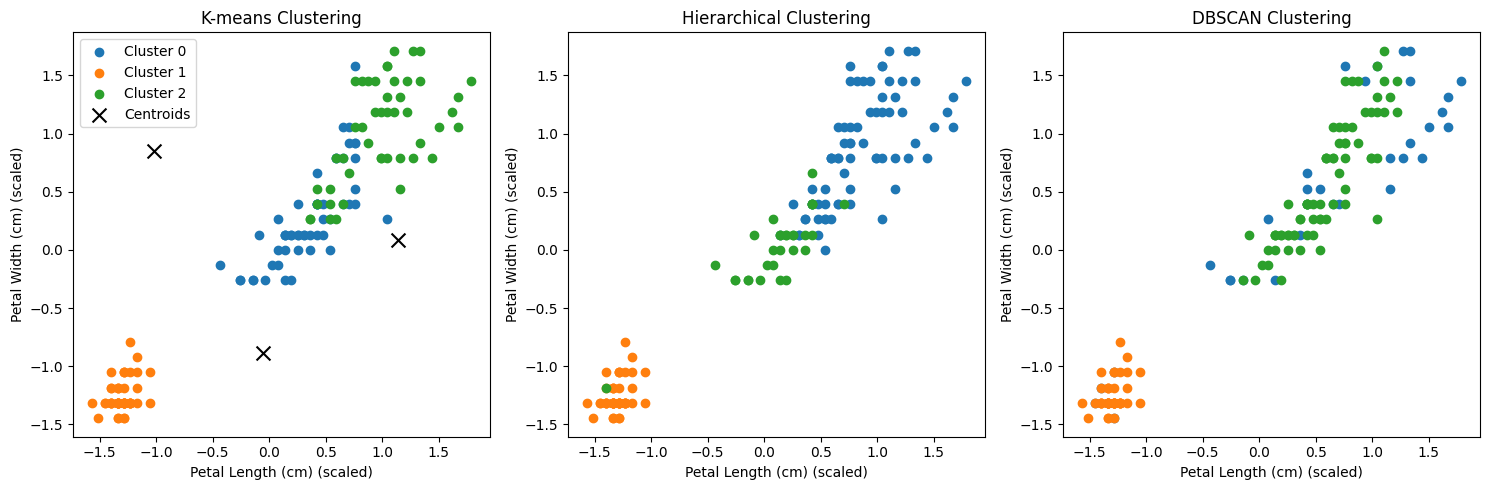

In [230]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_centroids = kmeans.cluster_centers_

# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(15, 5))

# K-means clustering
plt.subplot(1, 3, 1)
for cluster in range(3):
    plt.scatter(X_scaled[kmeans_labels == cluster, 2], X_scaled[kmeans_labels == cluster, 3], label=f'Cluster {cluster}')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='x', color='black', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Petal Length (cm) (scaled)')
plt.ylabel('Petal Width (cm) (scaled)')
plt.legend()

# Hierarchical clustering
plt.subplot(1, 3, 2)
for cluster in range(3):
    plt.scatter(X_scaled[hierarchical_labels == cluster, 2], X_scaled[hierarchical_labels == cluster, 3], label=f'Cluster {cluster}')
plt.title('Hierarchical Clustering')
plt.xlabel('Petal Length (cm) (scaled)')
plt.ylabel('Petal Width (cm) (scaled)')

# DBSCAN clustering
plt.subplot(1, 3, 3)
for cluster in range(-1, 3):  # -1 represents noise points
    plt.scatter(X_scaled[dbscan_labels == cluster, 2], X_scaled[dbscan_labels == cluster, 3], label=f'Cluster {cluster}')
plt.title('DBSCAN Clustering')
plt.xlabel('Petal Length (cm) (scaled)')
plt.ylabel('Petal Width (cm) (scaled)')

plt.tight_layout()
plt.show()
